In [14]:
%gui qt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from mayavi import mlab
from mpl_toolkits.mplot3d import Axes3D

import mne
from mne.viz import plot_alignment, snapshot_brain_montage
print(__doc__)

C:\Users\sunh20\AppData\Local\Continuum\anaconda3\envs\grid\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


Automatically created module for IPython interactive environment


In [65]:
mat = loadmat(mne.datasets.misc.data_path() + '/ecog/sample_ecog.mat')
ch_names = mat['ch_names'].tolist()
elec_old = mat['elec']  # electrode positions given in meters

# test
elec = loadmat('DATA/grid_loc/ffb52f92_trodes.mat')
grid = elec['Grid']/1000

montage = mne.channels.make_dig_montage(ch_pos=dict(zip(ch_names, grid)),
                                        coord_frame='head')
print('Created %s channel positions' % len(ch_names))

Created 64 channel positions


In [63]:
info = mne.create_info(ch_names, 1000., 'ecog', montage=montage)

In [64]:
# creates image of brain - no electrodes
subject = 'ffb52f92'
subjects_dir = r'C:\Users\sunh20\Documents\Subjects'
# subjects_dir = mne.datasets.sample.data_path() + '/subjects'
fig = plot_alignment(info, subject=subject, subjects_dir=subjects_dir,
                     surfaces=['pial'])
mne.viz.set_3d_view(fig, 200, 70)

After running this block of code, a Mayavi Scene screen should have appeared, which can be rotated / interacted with

## This next section of code will initially throw an error - just run it again and it should work 
Turning the orientation on the Mayavi screen will change the screenshot taken and displayed  
You can also set the orientation by using the .set_3d_view() function  
The code will also throw an error if you exit the Mayavi screen - just run the .set_3d_view() function again

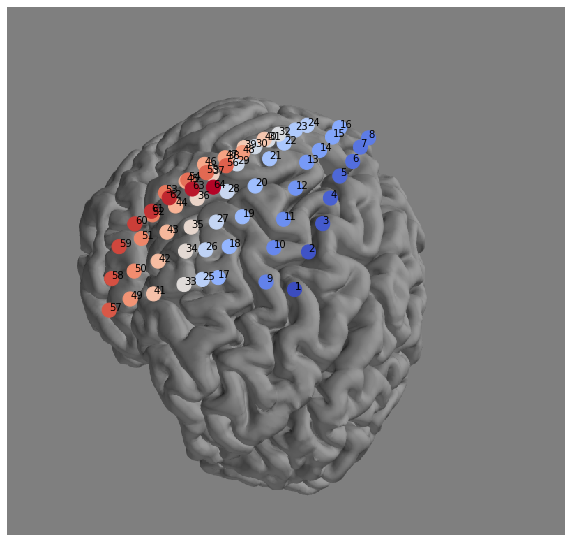

In [61]:
xy, im = snapshot_brain_montage(fig, montage)

# Convert from a dictionary to array to plot
xy_pts = np.vstack([xy[ch] for ch in info['ch_names']])

# Define an arbitrary "activity" pattern for viz
activity = np.linspace(100, 200, xy_pts.shape[0])

# This allows us to use matplotlib to create arbitrary 2d scatterplots
_, ax = plt.subplots(figsize=(10, 10))
ax.imshow(im)
ax.scatter(*xy_pts.T, c=activity, s=200, cmap='coolwarm')
ax.annotate('1',xy_pts[0])
ax.set_axis_off()

# add labels to electrodes
for num in np.arange(0,64):
    ax.annotate(str(num+1),xy_pts[num])

plt.show()

In [ ]:
subj_dir = r"C:\Users\sunh20\Documents\Subjects\\"
hemisphere = 'lh'
subject = '38e116'
hires = True

hires_model = subj_dir + subject + '\\surf\\' + subject + '_cortex_' + hemisphere + '_hires.mat'
lowres_model = subj_dir + subject + '\\surf\\' + subject + '_cortex_' + hemisphere + '_lowres.mat'

if hires:
    path = hires_model
    idx = 'cortex'
else:
    path = lowres_model
    idx = 'lowres_cortex'

cortex_3d = loadmat(path)
x = cortex_3d[idx]['vertices'][0][0][:,0]
y = cortex_3d[idx]['vertices'][0][0][:,1]
z = cortex_3d[idx]['vertices'][0][0][:,2]
faces = cortex_3d[idx]['faces'][0][0]

fig2 = FF.create_trisurf(x=x, y=y, z=z,
                         simplices=faces,
                         title="subject")
# plot(fig1,filename="brain.html")
